# IMDb Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data scrapping for the application

## Background

At this project, we will try to scrap movies data from IMDb (Intrernet Movies Database) website. IMDb is the world's most popular and authoritative source for movie, TV and celebrity content. Find ratings and reviews for the newest movie and TV shows.

This data scrap is just for educational purpose. We will scrap 4 points from this site. Movie Title, rating, metascore, and total vote. We will limit the year period only on 2021 to make this project light and easy to follow. Then, we will make simple analysis using the data. 

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [56]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31')

To visualize what exactly you get from the `request.get`, we can use `.content` so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [57]:
url_get.content[:500]

b'\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n      '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [58]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

In [59]:
type(soup)

bs4.BeautifulSoup

In [60]:
print(soup.prettify())

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Released between 2021-01-01 and 2021-12-31
(Sorted by Popularity Ascending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
  </script>
  <link href="https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31" r

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()`. To get the keywords for scrapping, we need go to the website (`https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31`) we used before. Explore using browser `Inspect` tool to find the specific segment/HTML tag of the data we want to scrap. The segment must contains all data we will scrap, not just segment with one data (movie). We find the data segment using `div` tag and specific attribute `class: lister-list`. Now we can put the key into `.find()` method.

In [61]:
table = soup.find('div', attrs={'class': 'lister-list'})
print(table.prettify()[1:500])

div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt8179402">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt8179402/">
    <img alt="Fate: The Winx Saga" class="loadlate" data-tconst="tt8179402" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMzEyYzBhODYtZjZlOC00MTM4LWIxMjQtMTRhZjA5ODM4ZWI2XkEyXkFqcGdeQXVyODQwODA1MjY@._V1_UY98_CR5


`.find()` method is used to get the one specific HTML data from Beautiful soup object. After we get the datas segment, now we can use `.find_all()` to get all title movies HTML segment. Explore using Inspect tool to find the tittle key and put into method parameter.

In [62]:
titles = table.find_all('h3', attrs={'class':'lister-item-header'})
titles[:3]

[<h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt8179402/">Fate: The Winx Saga</a>
 <span class="lister-item-year text-muted unbold">(2021– )</span>
 </h3>,
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">2.</span>
 <a href="/title/tt13406094/">The White Lotus</a>
 <span class="lister-item-year text-muted unbold">(2021–2022)</span>
 </h3>,
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">3.</span>
 <a href="/title/tt12851524/">Only Murders in the Building</a>
 <span class="lister-item-year text-muted unbold">(2021– )</span>
 </h3>]

In [63]:
titles[0].find('a').text

'Fate: The Winx Saga'

`.text` attribute is used to get the text data on HTML tag. Then, try the same technique to find other points (`rating`, `metascore`, `votes`).

In [64]:
rating_bar = table.find_all('div', attrs={'class':'ratings-bar'})
rating_bar[:3]

[<div class="ratings-bar">
 <div class="inline-block ratings-imdb-rating" data-value="6.9" name="ir">
 <span class="global-sprite rating-star imdb-rating"></span>
 <strong>6.9</strong>
 </div>
 <div class="inline-block ratings-user-rating">
 <span class="userRatingValue" data-tconst="tt8179402" id="urv_tt8179402">
 <span class="global-sprite rating-star no-rating"></span>
 <span class="rate" data-no-rating="Rate this" data-value="0" name="ur">Rate this</span>
 </span>
 <div class="starBarWidget" id="sb_tt8179402">
 <div class="rating rating-list" data-csrf-token="" data-ga-identifier="" data-starbar-class="rating-list" data-user="" id="tt8179402|imdb|6.9|6.9|adv_li_tt||advsearch|title" itemprop="aggregateRating" itemscope="" itemtype="http://schema.org/AggregateRating" title="Users rated this 6.9/10 (44,247 votes) - click stars to rate">
 <meta content="6.9" itemprop="ratingValue"/>
 <meta content="10" itemprop="bestRating"/>
 <meta content="44247" itemprop="ratingCount"/>
 <span class

In [65]:
rating_bar[0].find('strong').text

'6.9'

In [66]:
rating_bar[0].find('span', attrs={'class':'metascore favorable'})

In [67]:
rating_bar[4].find('span', attrs={'class':'metascore favorable'}).text.strip()

'65'

`.strip()` method is used for delete white-space character if found.

In [68]:
votes = table.find_all('p', attrs={'class':'sort-num_votes-visible'})
votes[:3]

[<p class="sort-num_votes-visible">
 <span class="text-muted">Votes:</span>
 <span data-value="44247" name="nv">44,247</span>
 </p>,
 <p class="sort-num_votes-visible">
 <span class="text-muted">Votes:</span>
 <span data-value="67436" name="nv">67,436</span>
 </p>,
 <p class="sort-num_votes-visible">
 <span class="text-muted">Votes:</span>
 <span data-value="96079" name="nv">96,079</span>
 </p>]

In [69]:
votes[0].find('span', attrs={'name': 'nv'}).text

'44,247'

Finding row length. We need the row/data length to make looping step. You can scrap data one by one, but this will need a lot of time. Looping will make the scrapping process faster and efficient. We can do looping process because the data has repeatable characteristic.

In [70]:
row_length = len(votes)
row_length

50

First, we define `temp` list variable to gather all the data we will scrap. We use python `for` function to make a looping. `for` will make iteration over a sequence (list, tupple, dict, string, etc). we use `range()` function to make the iteration sequence. `for` function will pass the iteration number (`i`). Then, we can scrap the data by put `i` into each each points variable (title, rating, metascore_sec, votes) `[i]` to slice the datas. On `metascore_sec`, we will use `if` `else` function because not all movies have a metascore. In every iteration we will put the datas to `temp` list variable using `.append()` method.

In [71]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    title = titles[i].find('a').text
    
    rating = rating_bar[i].find('strong').text.strip()
    
    metascore_sec = rating_bar[i].find('span', attrs={'class':'metascore favorable'})
    if metascore_sec is not None:
        metascore = metascore_sec.text.strip()
    else:
        metascore = metascore_sec
        
    vote = votes[i].find('span', attrs={'name': 'nv'}).text.strip()

    temp.append((title, rating, metascore, vote))
temp 

[('Fate: The Winx Saga', '6.9', None, '44,247'),
 ('The White Lotus', '7.6', None, '67,436'),
 ('Only Murders in the Building', '8.1', None, '96,079'),
 ('Abbott Elementary', '8.2', None, '13,584'),
 ('The Black Phone', '7.0', '65', '112,200'),
 ('Resident Alien', '8.1', None, '39,123'),
 ('American Horror Stories', '6.2', None, '20,717'),
 ('1883', '8.8', None, '63,084'),
 ('Reservation Dogs', '8.1', None, '14,537'),
 ('Spider-Man: No Way Home', '8.3', '71', '729,717'),
 ('La scuola cattolica', '5.7', None, '1,762'),
 ('Dune: Part One', '8.0', '74', '613,916'),
 ('Licorice Pizza', '7.2', '90', '105,180'),
 ('Forsvinningen på Lørenskog', '6.1', None, '1,006'),
 ('Dopesick', '8.6', None, '54,407'),
 ("NCIS: Hawai'i", '6.3', None, '5,518'),
 ('Mona Lisa and the Blood Moon', '6.2', '68', '944'),
 ('The Little Things', '6.3', None, '99,505'),
 ('Bloodlands', '6.6', None, '5,065'),
 ('Arcane: League of Legends', '9.0', None, '197,600'),
 ('Yellowjackets', '7.9', None, '44,799'),
 ('The Whee

## Creating data frame & Data wrangling

After we get all datas, we can transform `temp` list into dataframe using pandas library

In [72]:
import pandas as pd

df = pd.DataFrame(temp, columns=('title', 'rating', 'metascore', 'votes'))
df.head()

,title,rating,metascore,votes
0,Fate: The Winx Saga,6.9,None,"44,247"
1,The White Lotus,7.6,None,"67,436"
2,Only Murders in the Building,8.1,None,"96,079"
3,Abbott Elementary,8.2,None,"13,584"
4,The Black Phone,7.0,65,"112,200"


We check data types of each column using `.dtypes` attributes. we can see that the all the data type is object.

In [73]:
df.dtypes

title        object
rating       object
metascore    object
votes        object
dtype: object

Now, we will change the data type of rating, metascore, and votes column into numeric type. Before that, we need to fill `None` metascore datas by 0 and delete the comma in votes datas.

In [74]:
df.metascore.fillna(0, inplace=True)
df.head()

,title,rating,metascore,votes
0,Fate: The Winx Saga,6.9,0,"44,247"
1,The White Lotus,7.6,0,"67,436"
2,Only Murders in the Building,8.1,0,"96,079"
3,Abbott Elementary,8.2,0,"13,584"
4,The Black Phone,7.0,65,"112,200"


In [75]:
df.votes = df.votes.str.replace(',', '')
df.head()

,title,rating,metascore,votes
0,Fate: The Winx Saga,6.9,0,44247
1,The White Lotus,7.6,0,67436
2,Only Murders in the Building,8.1,0,96079
3,Abbott Elementary,8.2,0,13584
4,The Black Phone,7.0,65,112200


In [76]:
df = df.astype({'rating':'float', 'metascore': 'int', 'votes': 'int'})
df.dtypes

title         object
rating       float64
metascore      int32
votes          int32
dtype: object

We can change data types using `.astype()` function.

All the data preparation is done, now we can analyse the data. We will make a simple analysis to the data. we will find top 7 popularity of the movies in 2021 acording to total votes.

In [77]:
top_7_popularity = df.sort_values(by='votes', ascending=False).head(7).copy()
top_7_popularity

,title,rating,metascore,votes
9,Spider-Man: No Way Home,8.3,71,729717
11,Dune: Part One,8.0,74,613916
42,Don't Look Up,7.2,0,526255
25,Ojing-eo geim,8.0,0,435959
23,No Time to Die,7.3,68,390023
48,Free Guy,7.1,62,361000
36,Eternals,6.3,0,333256


We use `.sort_values()` method to short the data by `votes` column and get the top 7 popular movies. Then we `.copy()` and store the datas into `top_7_popularity` variable

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:ylabel='title'>

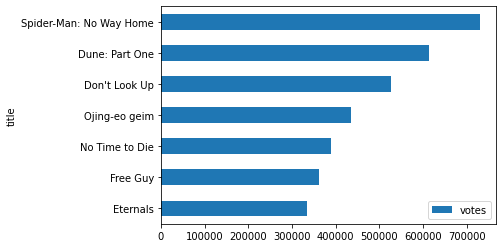

In [78]:
top_7_popularity[['title', 'votes']].set_index('title').sort_values('votes').plot(kind='barh')

Based on the graph above, we can conclude that Spider-Man: No Way Home is the most popular movie on 2021 period based on total votes with more than 700000 votes.

<AxesSubplot:ylabel='title'>

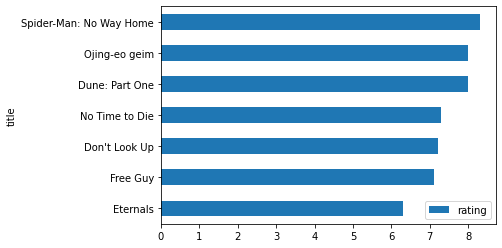

In [79]:
top_7_popularity[['title', 'rating']].set_index('title').sort_values('rating').plot(kind='barh')

Not only the most popular movie, Spider-Man: No Way Home also has the highest rating between top 7 popular movies on 2021.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.